YADDUM test

In [1]:
import yaddum as yaddum
import numpy as np  
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
lidar_uncertainty = yaddum.Uncertainty()

In [3]:
lidar_uncertainty.add_measurements('mesh', 'horizontal_mesh', 
                                   resolution = 10, 
                                   mesh_center = np.array([0,0,100]), 
                                   extent = 1000)

lidar_uncertainty.add_measurements('pts', 'points', 
                                  positions = np.array([[500,-500,100], [1000,2,300]]))

Measurements 'mesh' added to the measurement dictionary, which now contains 1 measurement instance(s).
Measurements 'pts' added to the measurement dictionary, which now contains 2 measurement instance(s).


In [4]:
model_pars={'wind_speed':10,
            'upward_air_velocity':0,
            'wind_from_direction':0,
            'reference_height':100,
            'shear_exponent':0.2}
lidar_uncertainty.add_atmosphere('pl_1', 'power_law', model_pars)

Atmosphere 'pl_1' added to the atmosphere dictionary, which now contains 1 atmosphere instance(s).


In [5]:
uncertainty_pars = {'U_los':0.1,
                    'U_azimuth':0.1,
                    'U_elevation':0.1, 
                    'U_range':1}

lidar_pos_1 = np.array([0,0,0])
lidar_pos_2 = np.array([1000,1000,0])

lidar_uncertainty.add_instrument('koshava', lidar_pos_1, **uncertainty_pars)
lidar_uncertainty.add_instrument('whittle', lidar_pos_2, **uncertainty_pars)

Instrument 'koshava' of category 'lidar' added to the instrument dictionary, which now contains 1 instrument(s).
Instrument 'whittle' of category 'lidar' added to the instrument dictionary, which now contains 2 instrument(s).


In [6]:
lidar_uncertainty.calculate_uncertainty(['koshava', 'whittle'],'mesh','pl_1', 'dual-Doppler')

/Volumes/Secondary_Drive/work/projects/YADDUM/yaddum/yaddum.py:1090: RuntimeWarning: divide by zero encountered in reciprocal
  uncertainty =((wind_speed * (np.sin(angle_dif))**2)**-1 *
/Volumes/Secondary_Drive/work/projects/YADDUM/yaddum/yaddum.py:1142: RuntimeWarning: divide by zero encountered in reciprocal
  (wind_speed**4 * np.sin(angle_dif)**2)**-1


In [7]:
lidar_uncertainty.uncertainty

<xarray.Dataset>
Dimensions:                          (Easting: 201, Id: 2, Northing: 201)
Coordinates:
  * Id                               (Id) object 'koshava' 'whittle'
  * Easting                          (Easting) int64 -1000 -990 ... 990 1000
  * Northing                         (Northing) int64 -1000 -990 ... 990 1000
    Height                           int64 100
Data variables:
    azimuth                          (Id, Northing, Easting) float64 225.0 ... 0.0
    elevation                        (Id, Northing, Easting) float64 4.045 ... 90.0
    range                            (Id, Northing, Easting) float64 1.418e+03 ... 100.0
    radial_speed                     (Id, Northing, Easting) float64 -7.053 ... 6.123e-16
    azimuth_gain                     (Id, Northing, Easting) float64 -0.7053 ... 0.0
    elevation_gain                   (Id, Northing, Easting) float64 -1.945 ... -1.0
    range_gain                       (Id, Northing, Easting) float64 -9.95e-05 ... 1.225e-19


In [8]:
azimuth_1 = lidar_uncertainty.uncertainty.azimuth.sel(Id = 'koshava').values
azimuth_2 = lidar_uncertainty.uncertainty.azimuth.sel(Id = 'whittle').values

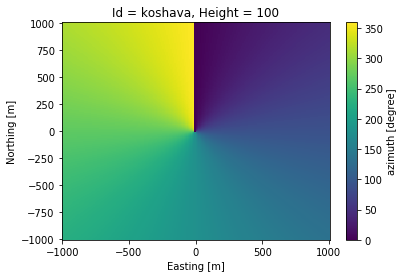

In [9]:
lidar_uncertainty.uncertainty.azimuth.sel(Id = 'koshava').plot()